<a href="https://colab.research.google.com/github/aninaredla/ML_Models_Unbalanced_Data/blob/main/m637_project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving corporate_rating.csv to corporate_rating.csv


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Replace with your actual file name from the upload
df = pd.read_csv('corporate_rating.csv')

# Show the first few rows
df.head()

dfnum = df.drop(['Rating','Name','Symbol','Rating Agency Name','Date','Sector'],axis = 1)
all = dfnum

cov = dfnum.corr()

#cov.to_csv("covariance_matrix.csv")
#from google.colab import files
#files.download("covariance_matrix.csv")

y = df['Rating']

liquidity = df[['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding']]
liquidity = scale.fit_transform(liquidity)

profitability = df[['grossProfitMargin','operatingProfitMargin','pretaxProfitMargin','netProfitMargin','effectiveTaxRate','returnOnAssets','returnOnEquity','returnOnCapitalEmployed']]
profitability = scale.fit_transform(profitability)

debt = df[['debtRatio','debtEquityRatio']]
debt = scale.fit_transform(debt)

operating = df[['assetTurnover']]
operating = scale.fit_transform(operating)

cashFlow = df[['operatingCashFlowPerShare','freeCashFlowPerShare','cashPerShare','operatingCashFlowSalesRatio','freeCashFlowOperatingCashFlowRatio']]
cashFlow = scale.fit_transform(cashFlow)



In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, tdevice: str = None):
    """Prints duration"""
    total_time = end - start
    print(f"Train time on {tdevice}: {total_time:.3f} seconds")
    return total_time

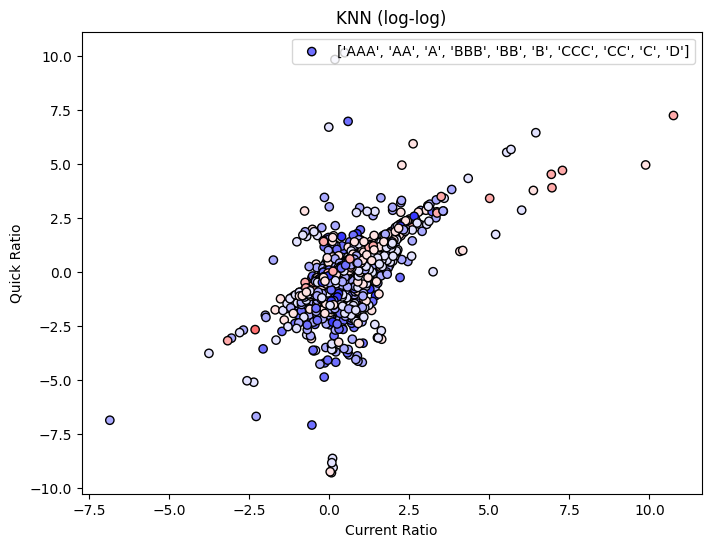

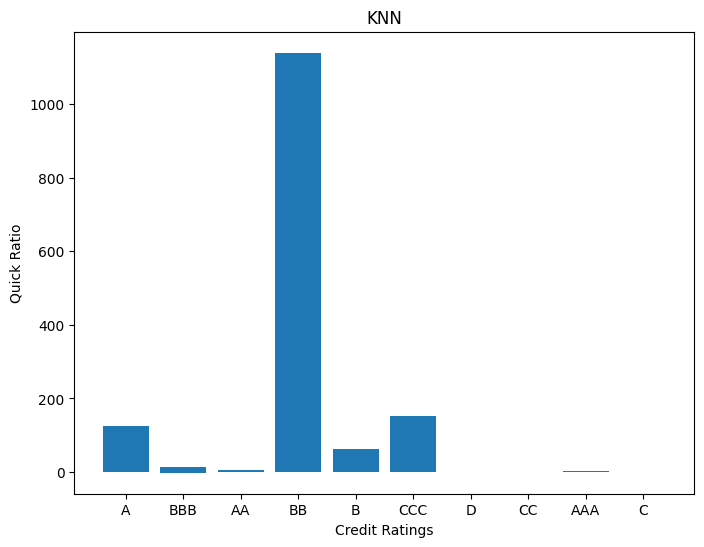

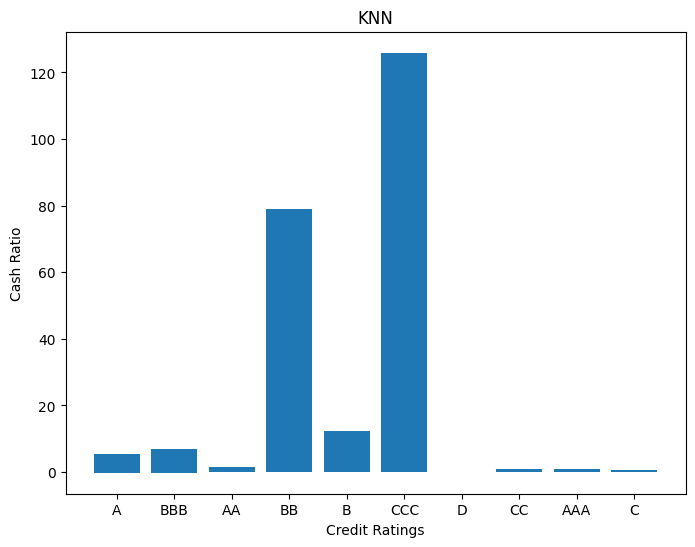

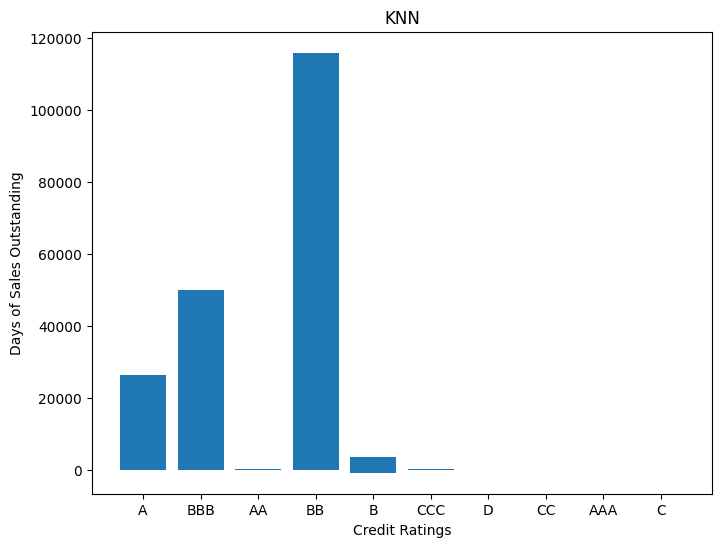

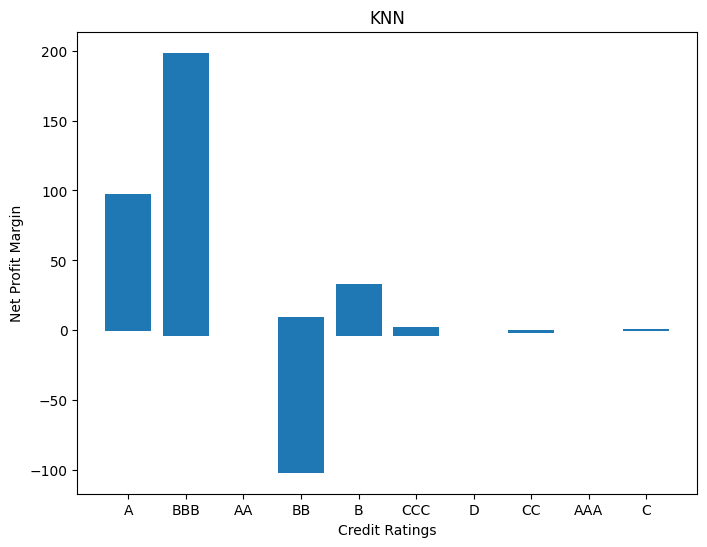

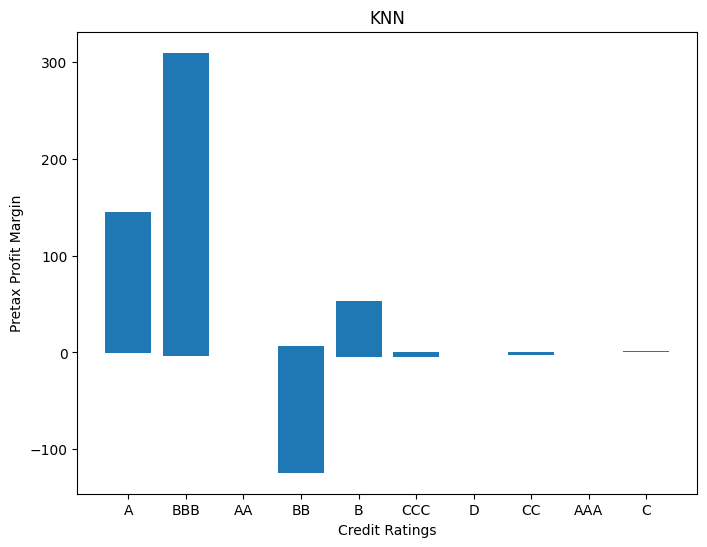

In [ ]:
Xnp = np.array(all)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

lab = ['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']

plt.figure(figsize=(8, 6))
#plt.bar(ynp,Xnp[:,0])
plt.scatter(np.log2(Xnp[:,0]), np.log2(Xnp[:,1]), c = ynum, cmap='bwr', edgecolor='k',label = lab)
plt.title('KNN (log-log)')
plt.xlabel('Current Ratio')
plt.ylabel('Quick Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(ynp,Xnp[:,1])
#plt.scatter(ynp, Xnp[:, 0], c = ynum, cmap='bwr', edgecolor='k')
plt.title('KNN')
plt.xlabel('Credit Ratings')
plt.ylabel('Quick Ratio')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(ynp,Xnp[:,2])
#plt.scatter(ynp, Xnp[:, 0], c = ynum, cmap='bwr', edgecolor='k')
plt.title('KNN')
plt.xlabel('Credit Ratings')
plt.ylabel('Cash Ratio')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(ynp,Xnp[:,3])
#plt.scatter(ynp, Xnp[:, 0], c = ynum, cmap='bwr', edgecolor='k')
plt.title('KNN')
plt.xlabel('Credit Ratings')
plt.ylabel('Days of Sales Outstanding')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(ynp,Xnp[:,4])
#plt.scatter(ynp, Xnp[:, 0], c = ynum, cmap='bwr', edgecolor='k')
plt.title('KNN')
plt.xlabel('Credit Ratings')
plt.ylabel('Net Profit Margin')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(ynp,Xnp[:,5])
#plt.scatter(ynp, Xnp[:, 0], c = ynum, cmap='bwr', edgecolor='k')
plt.title('KNN')
plt.xlabel('Credit Ratings')
plt.ylabel('Pretax Profit Margin')
plt.show()

In [ ]:
##Using Liquidity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

min_values = liquidity.min()
max_values = liquidity.max()
mean_values = liquidity.mean()
std_values = liquidity.std()

#print("Minimum values for each column:")
#print(min_values)

#print("\nMaximum values for each column:")
#print(max_values)

#print("\nMean values for each column:")
#print(mean_values)

#print("\nStandard deviation values for each column:")
#print(std_values)

#convert to arrays for plotting
Xnp = np.array(liquidity)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.3, random_state=42)

#plot two features at a time
#plt.figure(figsize=(8, 6))
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 1]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Quick Ratio (log)')
#plt.show()
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 2]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Cash Ratio (log)')
#plt.show()
#plt.scatter(Xnp[:, 0], Xnp[:, 3], c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio')
#plt.ylabel('Days of Sales Outstanding')
#plt.show()
# Initialize the k-NN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model10 = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model2.fit(X_train, y_train)
knn_model5.fit(X_train, y_train)
knn_model10.fit(X_train, y_train)

dim = len(Xnp[0])

# Predict class labels
start_time = timer()
y_pred_knn_2 = knn_model2.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(2) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_5 = knn_model5.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs Liquidity KNN(5) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_10 = knn_model10.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(10) ", "{:.2e}".format(FLOPs))

# Evaluate the model
print(" ")
#print("Accuracy (2):", accuracy_score(y_test, y_pred_knn_2))
#print("\nClassification Report (2):\n", classification_report(y_test, y_pred_knn_2))
print("Accuracy Liquidity (5):", accuracy_score(y_test, y_pred_knn_5))
print("\nClassification Report (5):\n", classification_report(y_test, y_pred_knn_5))
#print("Accuracy (10):", accuracy_score(y_test, y_pred_knn_10))
#print("\nClassification Report (10):\n", classification_report(y_test, y_pred_knn_10))

# Confusion Matrix
#conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn_2)
#print("\nConfusion Matrix:\n", conf_matrix_knn2)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn_5)
#print("\nConfusion Matrix:\n", conf_matrix_knn5)
#conf_matrix_knn10 = confusion_matrix(y_test, y_pred_knn_10)
#print("\nConfusion Matrix:\n", conf_matrix_knn10)


FLOPs Liquidity KNN(5)  2.03e+08
 
Accuracy Liquidity (5): 0.33497536945812806

Classification Report (5):
               precision    recall  f1-score   support

           A       0.26      0.42      0.32       111
          AA       0.06      0.04      0.04        27
         AAA       0.33      0.25      0.29         4
           B       0.26      0.19      0.22        86
          BB       0.39      0.38      0.39       153
         BBB       0.41      0.40      0.41       201
          CC       0.00      0.00      0.00         3
         CCC       0.00      0.00      0.00        23
           D       0.00      0.00      0.00         1

    accuracy                           0.33       609
   macro avg       0.19      0.19      0.18       609
weighted avg       0.32      0.33      0.32       609



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Using Profitability
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#scaler = preprocessing.MinMaxScaler()

#X = scaler.fit_transform(X)
#print(X)

#shows
#min_values = profitability.min()
#max_values = profitability.max()
#mean_values = profitability.mean()
#std_values = profitability.std()

#print("Minimum values for each column:")
#print(min_values)

#print("\nMaximum values for each column:")
#print(max_values)

#print("\nMean values for each column:")
#print(mean_values)

#print("\nStandard deviation values for each column:")
#print(std_values)

#convert to arrays for plotting
Xnp = np.array(profitability)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.3, random_state=42)

#plot two features at a time
#plt.figure(figsize=(8, 6))
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 1]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Quick Ratio (log)')
#plt.show()
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 2]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Cash Ratio (log)')
#plt.show()
#plt.scatter(Xnp[:, 0], Xnp[:, 3], c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio')
#plt.ylabel('Days of Sales Outstanding')
#plt.show()
# Initialize the k-NN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model10 = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model2.fit(X_train, y_train)
knn_model5.fit(X_train, y_train)
knn_model10.fit(X_train, y_train)

dim = len(Xnp[0])

# Predict class labels
start_time = timer()
y_pred_knn_2 = knn_model2.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(2) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_5 = knn_model5.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs Profitability KNN(5) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_10 = knn_model10.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(10) ", "{:.2e}".format(FLOPs))

# Evaluate the model
print(" ")
#print("Accuracy (2):", accuracy_score(y_test, y_pred_knn_2))
#print("\nClassification Report (2):\n", classification_report(y_test, y_pred_knn_2))
print("Accuracy Profitability (5):", accuracy_score(y_test, y_pred_knn_5))
print("\nClassification Report (5):\n", classification_report(y_test, y_pred_knn_5))
#print("Accuracy (10):", accuracy_score(y_test, y_pred_knn_10))
#print("\nClassification Report (10):\n", classification_report(y_test, y_pred_knn_10))

# Confusion Matrix
#conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn_2)
#print("\nConfusion Matrix:\n", conf_matrix_knn2)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn_5)
#print("\nConfusion Matrix:\n", conf_matrix_knn5)
#conf_matrix_knn10 = confusion_matrix(y_test, y_pred_knn_10)
#print("\nConfusion Matrix:\n", conf_matrix_knn10)

FLOPs Profitability KNN(5)  2.94e+08
 
Accuracy Profitability (5): 0.3021346469622332

Classification Report (5):
               precision    recall  f1-score   support

           A       0.26      0.43      0.32       111
          AA       0.10      0.07      0.08        27
         AAA       0.00      0.00      0.00         4
           B       0.24      0.28      0.26        86
          BB       0.37      0.27      0.31       153
         BBB       0.36      0.34      0.35       201
          CC       0.00      0.00      0.00         3
         CCC       0.00      0.00      0.00        23
           D       0.00      0.00      0.00         1

    accuracy                           0.30       609
   macro avg       0.15      0.16      0.15       609
weighted avg       0.30      0.30      0.29       609



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Using debt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#scaler = preprocessing.MinMaxScaler()

#X = scaler.fit_transform(X)
#print(X)
#start_time = timer()
#shows
#min_values = debt.min()
#max_values = debt.max()
#mean_values = debt.mean()
#std_values = debt.std()

#print("Minimum values for each column:")
#print(min_values)

#print("\nMaximum values for each column:")
#print(max_values)

#print("\nMean values for each column:")
#print(mean_values)

#print("\nStandard deviation values for each column:")
#print(std_values)

#convert to arrays for plotting
Xnp = np.array(debt)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.3, random_state=42)

#plot two features at a time
#plt.figure(figsize=(8, 6))
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 1]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Quick Ratio (log)')
#plt.show()
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 2]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Cash Ratio (log)')
#plt.show()
#plt.scatter(Xnp[:, 0], Xnp[:, 3], c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio')
#plt.ylabel('Days of Sales Outstanding')
#plt.show()
# Initialize the k-NN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model10 = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model2.fit(X_train, y_train)
knn_model5.fit(X_train, y_train)
knn_model10.fit(X_train, y_train)

dim = len(Xnp[0])

# Predict class labels
start_time = timer()
y_pred_knn_2 = knn_model2.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(2) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_5 = knn_model5.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs Debt KNN(5) ", "{:.2e}".format(FLOPs))

# Evaluate the model
print(" ")
#print("Accuracy (2):", accuracy_score(y_test, y_pred_knn_2))
#print("\nClassification Report (2):\n", classification_report(y_test, y_pred_knn_2))
print("Accuracy Debt (5):", accuracy_score(y_test, y_pred_knn_5))
print("\nClassification Report (5):\n", classification_report(y_test, y_pred_knn_5))

start_time = timer()
y_pred_knn_10 = knn_model10.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs Debt KNN(10) ", "{:.2e}".format(FLOPs))

print("Accuracy Debt (10):", accuracy_score(y_test, y_pred_knn_10))
print("\nClassification Report (10):\n", classification_report(y_test, y_pred_knn_10))

# Confusion Matrix
#conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn_2)
#print("\nConfusion Matrix:\n", conf_matrix_knn2)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn_5)
#print("\nConfusion Matrix:\n", conf_matrix_knn5)
#conf_matrix_knn10 = confusion_matrix(y_test, y_pred_knn_10)
#print("\nConfusion Matrix:\n", conf_matrix_knn10)

FLOPs Debt KNN(5)  8.97e+07
 
Accuracy Debt (5): 0.23645320197044334

Classification Report (5):
               precision    recall  f1-score   support

           A       0.20      0.32      0.25       111
          AA       0.00      0.00      0.00        27
         AAA       0.00      0.00      0.00         4
           B       0.20      0.21      0.21        86
          BB       0.18      0.14      0.15       153
         BBB       0.33      0.34      0.34       201
          CC       0.00      0.00      0.00         3
         CCC       0.00      0.00      0.00        23
           D       0.00      0.00      0.00         1

    accuracy                           0.24       609
   macro avg       0.10      0.11      0.11       609
weighted avg       0.22      0.24      0.22       609

FLOPs Debt KNN(10)  7.77e+07
Accuracy Debt (10): 0.2742200328407225

Classification Report (10):
               precision    recall  f1-score   support

           A       0.18      0.21      0.19 

In [ ]:
#Using operating
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#scaler = preprocessing.MinMaxScaler()

#X = scaler.fit_transform(X)
#print(X)
#start_time = timer()
#shows
#min_values = operating.min()
#max_values = operating.max()
#mean_values = operating.mean()
#std_values = operating.std()

#print("Minimum values for each column:")
#print(min_values)

#print("\nMaximum values for each column:")
#print(max_values)

#print("\nMean values for each column:")
#print(mean_values)

#print("\nStandard deviation values for each column:")
#print(std_values)

#convert to arrays for plotting
Xnp = np.array(operating)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.3, random_state=42)

#plot two features at a time
#plt.figure(figsize=(8, 6))
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 1]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Quick Ratio (log)')
#plt.show()
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 2]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Cash Ratio (log)')
#plt.show()
#plt.scatter(Xnp[:, 0], Xnp[:, 3], c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio')
#plt.ylabel('Days of Sales Outstanding')
#plt.show()
# Initialize the k-NN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model10 = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model2.fit(X_train, y_train)
knn_model5.fit(X_train, y_train)
knn_model10.fit(X_train, y_train)

dim = len(Xnp[0])

# Predict class labels
start_time = timer()
y_pred_knn_2 = knn_model2.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(2) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_5 = knn_model5.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs Operating KNN(5) ", "{:.2e}".format(FLOPs))

# Evaluate the model
print(" ")
#print("Accuracy (2):", accuracy_score(y_test, y_pred_knn_2))
#print("\nClassification Report (2):\n", classification_report(y_test, y_pred_knn_2))
print("Accuracy Operating (5):", accuracy_score(y_test, y_pred_knn_5))
print("\nClassification Report (5):\n", classification_report(y_test, y_pred_knn_5))

#start_time = timer()
#y_pred_knn_10 = knn_model10.predict(X_test)
#end_time = timer()
#FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs Operating KNN(10) ", "{:.2e}".format(FLOPs))

#print("Accuracy Debt (10):", accuracy_score(y_test, y_pred_knn_10))
#print("\nClassification Report (10):\n", classification_report(y_test, y_pred_knn_10))

# Confusion Matrix
#conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn_2)
#print("\nConfusion Matrix:\n", conf_matrix_knn2)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn_5)
#print("\nConfusion Matrix:\n", conf_matrix_knn5)
#conf_matrix_knn10 = confusion_matrix(y_test, y_pred_knn_10)
#print("\nConfusion Matrix:\n", conf_matrix_knn10)

FLOPs Operating KNN(5)  1.74e+08
 
Accuracy Operating (5): 0.2742200328407225

Classification Report (5):
               precision    recall  f1-score   support

           A       0.21      0.27      0.23       111
          AA       0.11      0.04      0.06        27
         AAA       0.00      0.00      0.00         4
           B       0.11      0.09      0.10        86
          BB       0.30      0.29      0.29       153
         BBB       0.37      0.42      0.39       201
          CC       0.00      0.00      0.00         3
         CCC       0.00      0.00      0.00        23
           D       0.00      0.00      0.00         1

    accuracy                           0.27       609
   macro avg       0.12      0.12      0.12       609
weighted avg       0.25      0.27      0.26       609



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Using cashflow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#scaler = preprocessing.MinMaxScaler()

#X = scaler.fit_transform(X)
#print(X)
#start_time = timer()
#shows
#min_values = operating.min()
#max_values = operating.max()
#mean_values = operating.mean()
#std_values = operating.std()

#print("Minimum values for each column:")
#print(min_values)

#print("\nMaximum values for each column:")
#print(max_values)

#print("\nMean values for each column:")
#print(mean_values)

#print("\nStandard deviation values for each column:")
#print(std_values)

#convert to arrays for plotting
Xnp = np.array(cashFlow)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.3, random_state=42)

#plot two features at a time
#plt.figure(figsize=(8, 6))
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 1]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Quick Ratio (log)')
#plt.show()
#plt.scatter(np.log2(Xnp[:, 0]), np.log2(Xnp[:, 2]), c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio (log)')
#plt.ylabel('Cash Ratio (log)')
#plt.show()
#plt.scatter(Xnp[:, 0], Xnp[:, 3], c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Current Ratio')
#plt.ylabel('Days of Sales Outstanding')
#plt.show()
# Initialize the k-NN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model10 = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model2.fit(X_train, y_train)
knn_model5.fit(X_train, y_train)
knn_model10.fit(X_train, y_train)

dim = len(Xnp[0])

# Predict class labels
start_time = timer()
y_pred_knn_2 = knn_model2.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs KNN(2) ", "{:.2e}".format(FLOPs))

start_time = timer()
y_pred_knn_5 = knn_model5.predict(X_test)
end_time = timer()
FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs Cash Flow KNN(5) ", "{:.2e}".format(FLOPs))

# Evaluate the model
print(" ")
#print("Accuracy (2):", accuracy_score(y_test, y_pred_knn_2))
#print("\nClassification Report (2):\n", classification_report(y_test, y_pred_knn_2))
print("Accuracy Cash Flow (5):", accuracy_score(y_test, y_pred_knn_5))
print("\nClassification Report (5):\n", classification_report(y_test, y_pred_knn_5))

#start_time = timer()
#y_pred_knn_10 = knn_model10.predict(X_test)
#end_time = timer()
#FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
#print("FLOPs Operating KNN(10) ", "{:.2e}".format(FLOPs))

#print("Accuracy Debt (10):", accuracy_score(y_test, y_pred_knn_10))
#print("\nClassification Report (10):\n", classification_report(y_test, y_pred_knn_10))

# Confusion Matrix
#conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn_2)
#print("\nConfusion Matrix:\n", conf_matrix_knn2)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn_5)
#print("\nConfusion Matrix:\n", conf_matrix_knn5)
#conf_matrix_knn10 = confusion_matrix(y_test, y_pred_knn_10)
#print("\nConfusion Matrix:\n", conf_matrix_knn10)

FLOPs Cash Flow KNN(5)  1.38e+08
 
Accuracy Cash Flow (5): 0.28735632183908044

Classification Report (5):
               precision    recall  f1-score   support

           A       0.24      0.37      0.29       111
          AA       0.07      0.04      0.05        27
         AAA       0.00      0.00      0.00         4
           B       0.26      0.24      0.25        86
          BB       0.24      0.22      0.23       153
         BBB       0.38      0.39      0.38       201
          CC       0.00      0.00      0.00         3
         CCC       1.00      0.04      0.08        23
           D       0.00      0.00      0.00         1

    accuracy                           0.29       609
   macro avg       0.24      0.14      0.14       609
weighted avg       0.31      0.29      0.28       609



In [ ]:
#Using all
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#scaler = preprocessing.MinMaxScaler()

#X = scaler.fit_transform(X)
#print(X)
#start_time = timer()
#shows
#min_values = all.min()
#max_values = all.max()
#mean_values = all.mean()
#std_values = all.std()

#print("Minimum values for each column:")
#print(min_values)

#print("\nMaximum values for each column:")
#print(max_values)

#print("\nMean values for each column:")
#print(mean_values)

#print("\nStandard deviation values for each column:")
#print(std_values)

#convert to arrays for plotting
Xnp = np.array(all)
ynp = np.array(y)

#create new array that holds numeric equivalents for each rating
label_map = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6, 'CC': 7, 'C': 8, 'D': 9}
ynum = np.array([label_map[label] for label in ynp])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.3, random_state=42)

#plot two features at a time
#plt.figure(figsize=(8, 6))
#plt.scatter(Xnp[:, 0], Xnp[:, 1], c = ynum, cmap='bwr', edgecolor='k')
#plt.title('KNN')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.show()

# Initialize the k-NN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model10 = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model2.fit(X_train, y_train)
knn_model5.fit(X_train, y_train)
knn_model10.fit(X_train, y_train)

# Predict class labels
y_pred_knn_2 = knn_model2.predict(X_test)

start_time = timer()
y_pred_knn_5 = knn_model5.predict(X_test)
end_time = timer()

y_pred_knn_10 = knn_model10.predict(X_test)

# Evaluate the model
print("Accuracy (2):", accuracy_score(y_test, y_pred_knn_2))
print("\nClassification Report (2):\n", classification_report(y_test, y_pred_knn_2))

FLOPs = ((len(X_test)*len(X_train)*2*dim) + len(X_test)*len(X_train)*np.log2(len(X_train)))/(end_time-start_time)
print("FLOPs All KNN(5) ", "{:.2e}".format(FLOPs))
print("Accuracy All (5):", accuracy_score(y_test, y_pred_knn_5))
print("\nClassification Report (5):\n", classification_report(y_test, y_pred_knn_5))



print("Accuracy (10):", accuracy_score(y_test, y_pred_knn_10))
print("\nClassification Report (10):\n", classification_report(y_test, y_pred_knn_10))

# Confusion Matrix
conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn_2)
#print("\nConfusion Matrix:\n", conf_matrix_knn2)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn_5)
#print("\nConfusion Matrix:\n", conf_matrix_knn5)
conf_matrix_knn10 = confusion_matrix(y_test, y_pred_knn_10)
#print("\nConfusion Matrix:\n", conf_matrix_knn10)
#end_time = timer()
#print_train_time(start=start_time,
#                 end=end_time,
#                 tdevice="cpu")

Accuracy (2): 0.38095238095238093

Classification Report (2):
               precision    recall  f1-score   support

           A       0.33      0.67      0.44       111
          AA       0.18      0.19      0.18        27
         AAA       0.00      0.00      0.00         4
           B       0.34      0.44      0.38        86
          BB       0.44      0.39      0.41       153
         BBB       0.52      0.28      0.36       201
          CC       0.00      0.00      0.00         3
         CCC       0.00      0.00      0.00        23
           D       0.00      0.00      0.00         1

    accuracy                           0.38       609
   macro avg       0.20      0.22      0.20       609
weighted avg       0.40      0.38      0.37       609

FLOPs All KNN(5)  1.39e+09
Accuracy All (5): 0.361247947454844

Classification Report (5):
               precision    recall  f1-score   support

           A       0.32      0.51      0.40       111
          AA       0.25      0.

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    if hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        levels = [0.0, 0.5, 1.0]
        plt.contourf(xx, yy, Z, levels=levels, cmap='bwr', alpha=0.2)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(knn_model2, X_train, y_train, 'Decision Boundary - K-NN (k=3)')